# Propensity to Lapse: Options in an Infrequent Purchase Context

Main notebook documenting requirements, research, key findings, references and outcomes

## Summary

The aim of ‘propensity to lapse’ is to understand who in our customer base is ‘active’, ‘lapsing’ or ‘lost’. This enables us to communicate differently to customers with these different attributes. The propensity to lapse output needs to be calculated at an individual level as opposed to at group level. The output should be a **single categorical value against each customer record.**

It has been agreed with stakeholders that **two** segmentations will be created serving different use cases
* Transactional - focussing exclusively on propensity to lapse in the transactional context
* Behavioural - platform based engagement

Previously Theta used:
* 5 year prediction horizon
* Lost (p_alive <= 0.3), Lapsing (0.3 < p_alive < 0.6), Active (p_alive > 0.6)
* Predict p_alive and n_transactions (in 5yr p)

## Requirements

* Single catagorical value against each customer record 
  * active
  * lapsing
  * lost
* Must be reproducable in an automated way when required

## Options

* Rule Based Segmentation:
  * Calculate purchase frequency. Compare to time since last transaction.
* Cohort Based:
  * Group customers by aquisition date. Compare individual to cohort.
* BTYD Modelling with `lifetimes` package
  * Generate a probability of life based on transactions (requires at least 2)
* BTYD + Covariates:
  * As above but includes seasonality, external factors, Tenure effect (transactions more regular when first aquired), Cohort Shifts (Groups aquired at different dates can behave differently)
* Survival Analysis (Optional Covariates) `lifelines`, `scikit-survival` packages:
  * Estiamtes probability of custoemr lapsing and when


## Key Data

* Legacy Theta datasets: `mpb-platform-prod-f68e.theta_data_to_MPB` (use V2 data!)
* Bloomreach SCV: `mpb-platform-prod-f68e.bloomreach.SCV`
  * Aggregations for each customer
* STV: `mpb-data-science-dev-ab-602d.dsci_daw.STV`
  * Information on each transaction. Can be linked back to customer
  * Can be used to create aggregations if needed
* LIV: `mpb-data-science-dev-ab-602d.dsci_daw.line_item_view`
  * Information on model. Cna be linked back to transaction

## Thoughts

* Do we have access to catagorical data about customers? I assume not
  * No
* Would we want to classify customers with less than 2 transactions at all?
  * Maybe we assume active? Depends on definition
  * Use Theta setup
* How to evaluate performance? 
  * Train on historical data and see if predictions are accurate, CV etc.
  * Need to be careful of leakage in time
* How much data do we have (yrs)
  * About 10
* What is our defintion of lapsing, lost in terms of time?
   * 9 months / 15 months?
   * Use Theta
* Traditional ML (forests, bossitng, logistic reg, GLM)
* Do we care more about buy vs sell?
  * Using both/all for now

## Notes

### 26/08/25

* It does feel like I should eb creating a table and using tableau for this EDA but I really dont want to
* lifetimes is a veeeery old package and does appear to have some bugs here and there

### 26/09/25

• After some fixes to the lifetimes code we have some working models. Using the plot_history_alive() function, the result looks quite reasonable as well. ALthough the model fit plots suggest otherwise
* Looks like the model fits well. In terms of counts, but it does overpredict when it comes to the holdout set. Potnetially we could look at different sale directions
* Modified BGF more consistent, standard matches at 1 but oevrpredicts the rest. Modified equally overpredicts all. ParetoNBDFitter is much better
* Changing the penalizer to 0 didnt improve things on pareto. But Gave huge improvement for BGF Standard. We have a winner!
* Removing data before 2020 gives a big improvement. I think the older data is sparse and unreliable. But of course this only applies
* Need to fugire out what to do with customers who only have one purchase. The model can still estimate CLV but with the assumption that they are alive. May be a good thing
* We can use survival to predict a probability of survival
* Excluding single transaction customers:
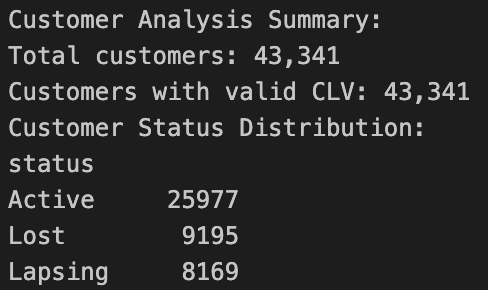
* With single transaction customers:
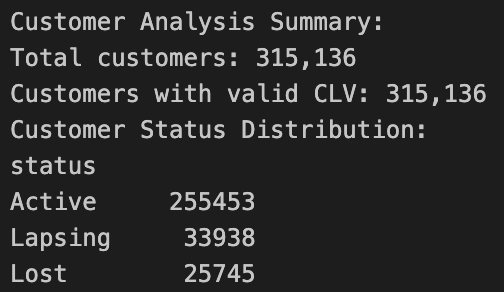

* We should absolutely exclude single transaction customers from modelling

## Research


* Popular features for modelling
  * Age, gender, location, income
  * Tenure
  * Plan type (more buy or sell for us?)
  * Payment frequency
  * Login frequency, view frequency
  * Email engagement
  * Mode of payment
  * Billing issues
  * Market
  * Seasonality
  * Economic conditions
  * We could also include the types of camera they are buying selling and money spent
  * Cohorts as customeres grouped by month/quarter/year
* Modelling approaches pretty spot on, what we have should be enough
* Evaulation Metrics
  * Precision/Recall/F1
  * ROC/AUC
  * Ranking and Lift
  * Calibration (ensure probability reflects real world)
  * ROI
* Count your customers paper:
  * Pareto/NBD
    * While active, transaction in period t is poisson with mean yt
    * Heterogeneity of transaction rate y fol,lows gamma distribution
    * Each customer has lifetime T. Distributed exponentially with dropout u
    * Heterogeneity of dropout rate follows gamma dist
    * transaction rate and dropout rate vary independently acros customers
  * BQ/NBD
    * Purchase ratee follows poisson
    * Rates are distributed by gamma
    * AFter a purchase customer becomes inactive with prob p
    * p follows beta distribution
    * y and p are independent

## Key Findings

### EDA

Total Transaction deciles (all types):

| Decile | Count |
|-------|-------|
| 0.0   | 1.0   |
| 0.1   | 1.0   |
| 0.2   | 1.0   |
| 0.3   | 1.0   |
| 0.4   | 1.0   |
| 0.5   | 1.0   |
| 0.6   | 2.0   |
| 0.7   | 2.0   |
| 0.8   | 3.0   |
| 0.9   | 6.0   |
| 1.0   | 5904  |


As we can see most data (50%) are made of single transactions
The min is 1 and max is 5904! Next highest is 469

If we look at deciles for avg days between transactions excluding where there is only 1 transaction we get the following:

| Decile | Frequency (Days)      |
|-------|-------------|
| 0.0   | 0.000000    |
| 0.1   | 8.920307    |
| 0.2   | 31.143269   |
| 0.3   | 69.967610   |
| 0.4   | 115.762619  |
| 0.5   | 169.000000  |
| 0.6   | 235.769162  |
| 0.7   | 327.740022  |
| 0.8   | 462.586192  |
| 0.9   | 742.000653  |
| 1.0   | 5066.000000 |

These will almost certainly vary by category that customers fall into. But for now we are assuming all customers are the same


### Lifetimes

Modelling approach is very effective where there are **at least two transactions**. Evaluations perform well. It's fast to run. Simple. Explainable

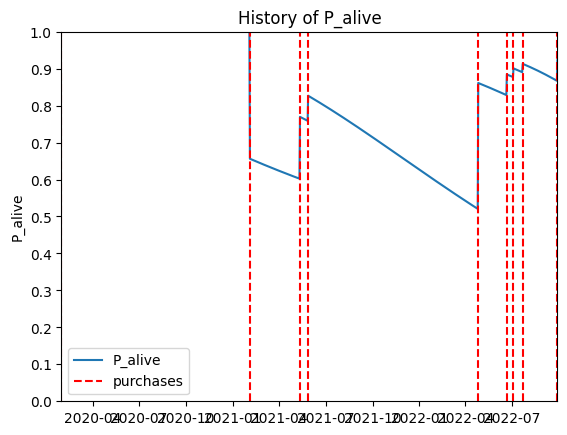

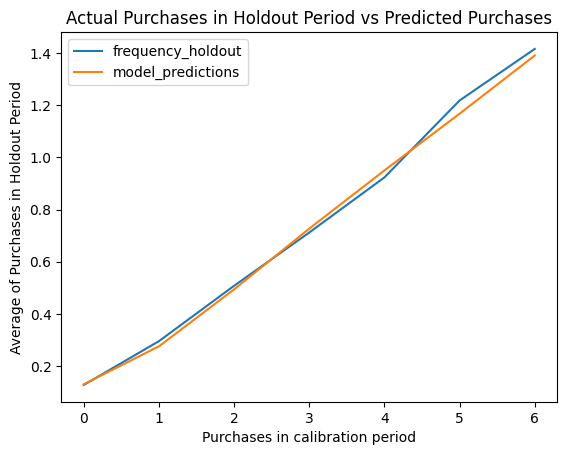

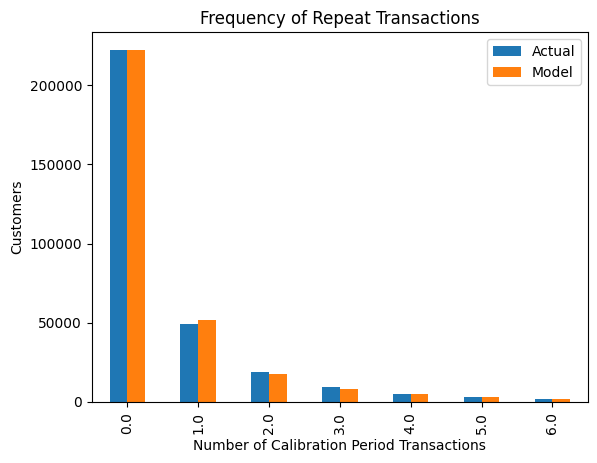

## References

* [Propensity to Lapse Kick off Slides](https://docs.google.com/presentation/d/179-C5yNzVS4nNXA_CbQMXH8GeMVuTY9nrZhiqoA1vOs/edit?slide=id.g370e1de7d7d_0_3#slide=id.g370e1de7d7d_0_3)
* [Options for approaches PtL Doc](https://docs.google.com/document/d/1ZJEun7c_fys9jN0EfnKOlXg8tthy1ArEfVPX_AJT86I/edit?tab=t.0)
* [Theta on CLV and ML Video](https://4634547.hs-sites.com/share/hubspotvideo/194067088397?utm_campaign=General&utm_medium=email&_hsenc=p2ANqtz-_eYBqy8-3U4YXMu1LaJqdalfo9lsuAElhOUYz4F9cDF1tcQDs6WmwKDzIzrVC8JBkcO_DOfHEBiqni60GK2fje8VYl2Q&_hsmi=374791551&utm_content=374791551&utm_source=hs_email)
* Dictionary from Theta project: ![image.png](attachment:image.png)
* [Counting Your Customers Paper](https://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf)